In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
path = 'F:\MeltingCurve' ## Path to the csv from the machine. 
df = pd.read_csv(path, sep='\t+', header=0)
df.drop(0, inplace=True)
df.head(10)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,Record,Type,Sample Name,Measurement Date and Time,T (°C),Z-Ave (d.nm),PdI,Pk 1 Mean Int (d.nm),Pk 2 Mean Int (d.nm),Pk 3 Mean Int (d.nm),Pk 1 Area Int (Percent),Pk 2 Area Int (Percent),Pk 3 Area Int (Percent),Aggregation Index,Scattering Angle (°)
1,121,Size,Lin28 high conc fresh 1,Donnerstag. 16. Dezember 2021 16:48:44,5.0,33.08,0.663,40.39,385.800,5.541,63.2,21.3,10.5,173.0,NaN
2,122,Size,Lin28 high conc fresh 2,Donnerstag. 16. Dezember 2021 16:50:47,5.0,34.74,0.608,38.42,220.700,2517.000,58.8,16.6,14.2,173.0,NaN
3,123,Size,Lin28 high conc fresh 3,Donnerstag. 16. Dezember 2021 16:52:51,5.0,31.19,0.718,70.28,23.120,905.200,42.8,31.6,17.6,173.0,NaN
4,124,Size,Lin28 high conc fresh 4,Donnerstag. 16. Dezember 2021 17:00:29,6.0,55.00,0.620,32.17,2754.000,137.300,38.4,30.4,24.0,173.0,NaN
5,125,Size,Lin28 high conc fresh 5,Donnerstag. 16. Dezember 2021 17:02:32,6.0,46.18,0.518,34.57,191.500,3225.000,48.1,28.0,15.1,173.0,NaN
6,126,Size,Lin28 high conc fresh 6,Donnerstag. 16. Dezember 2021 17:04:36,6.0,41.98,0.548,39.06,192.200,3044.000,52.5,23.6,13.4,173.0,NaN
7,127,Size,Lin28 high conc fresh 7,Donnerstag. 16. Dezember 2021 17:12:11,7.0,45.03,0.563,38.35,193.300,5.765,53.5,24.2,9.8,173.0,NaN
8,128,Size,Lin28 high conc fresh 8,Donnerstag. 16. Dezember 2021 17:14:15,7.0,31.80,0.698,55.51,5.784,497.200,77.3,11.6,10.1,173.0,NaN
9,129,Size,Lin28 high conc fresh 9,Donnerstag. 16. Dezember 2021 17:16:18,7.0,35.03,0.669,36.59,152.900,6.018,50.5,29.1,11.1,173.0,NaN
10,130,Size,Lin28 high conc fresh 10,Donnerstag. 16. Dezember 2021 17:23:52,8.0,38.24,0.615,39.70,386.200,5.607,58.3,28.3,10.0,173.0,NaN


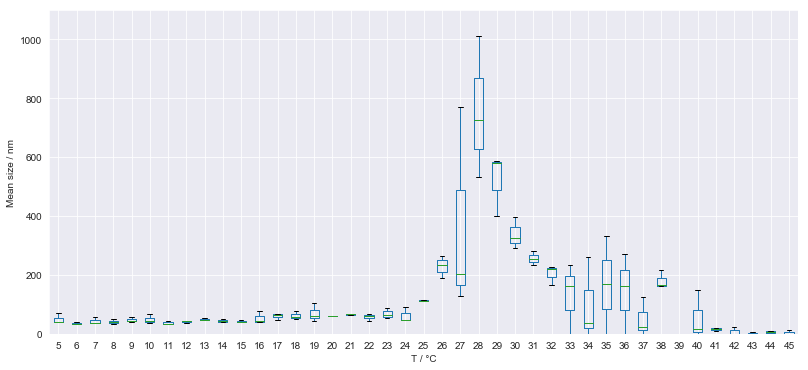

In [107]:
fig, ax = plt.subplots(1, figsize=(13,6))
#plt.yscale('log')
plt.ylim(0, 1100)
bp = df[['T (°C)', 'Pk 1 Mean Int (d.nm)']].boxplot(by="T (°C)", ax=ax)
ax.set_xticklabels(np.round(np.arange(5, 46, 1), 0))
plt.xlabel('T / °C', fontsize=10)
plt.ylabel('Mean size / nm', fontsize=10)
plt.title(None)
fig.suptitle(None)
fig.savefig('DLS_Lin28.png', format='png', dpi=200)
plt.show()

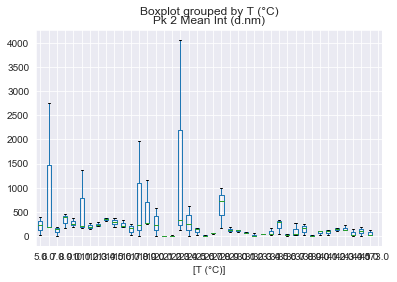

In [75]:
bp = df[['T (°C)', 'Pk 2 Mean Int (d.nm)']].boxplot(by="T (°C)")

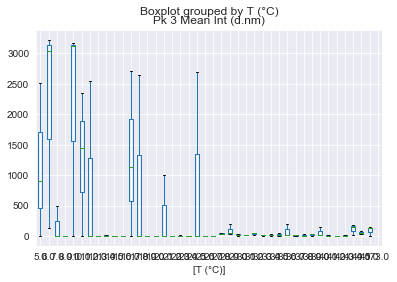

In [76]:
bp = df[['T (°C)', 'Pk 3 Mean Int (d.nm)']].boxplot(by="T (°C)")

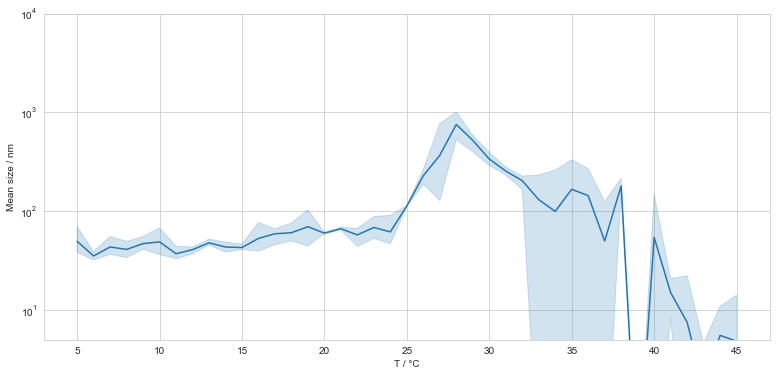

In [120]:
sizes = df[['T (°C)', 'Pk 1 Mean Int (d.nm)', 'Pk 2 Mean Int (d.nm)', 'Pk 3 Mean Int (d.nm)']]
sizes.set_index(sizes['T (°C)'], inplace=True)

sizes_melt = pd.melt(df, id_vars=['T (°C)'], value_vars=['Pk 1 Mean Int (d.nm)', 'Pk 2 Mean Int (d.nm)', 'Pk 3 Mean Int (d.nm)'], var_name='peak', value_name='mean size')

sns.set_style('whitegrid')
fig=plt.figure(figsize=(13,6))

#sns.scatterplot(
#    data=sizes, x='T (°C)', y='Pk 1 Mean Int (d.nm)')
sns.lineplot(data=sizes, x='T (°C)', y='Pk 1 Mean Int (d.nm)')
plt.yscale('log')
plt.ylim(5, 10000)
#sns.relplot(data=sizes, x='T (°C)')

plt.xlabel('T / °C', fontsize=10)
plt.ylabel('Mean size / nm', fontsize=10)
plt.title(None)
fig.suptitle(None)
fig.savefig('DLS_Lin28_line95conf_peak1.png', format='png', dpi=200)
plt.show()

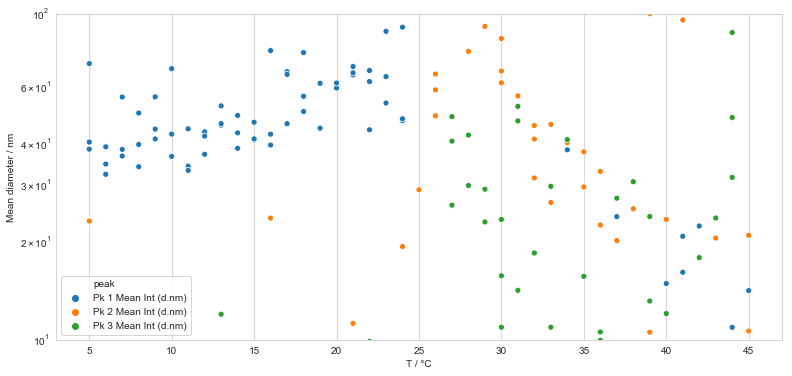

In [127]:
sizes = df[['T (°C)', 'Pk 1 Mean Int (d.nm)', 'Pk 2 Mean Int (d.nm)', 'Pk 3 Mean Int (d.nm)']]
sizes.set_index(sizes['T (°C)'], inplace=True)

sizes_melt = pd.melt(df, id_vars=['T (°C)'], value_vars=['Pk 1 Mean Int (d.nm)', 'Pk 2 Mean Int (d.nm)', 'Pk 3 Mean Int (d.nm)'], var_name='peak', value_name='mean size')

sns.set_style('whitegrid')
fig=plt.figure(figsize=(13,6))

sns.scatterplot(
    data=sizes_melt, x='T (°C)', y='mean size', hue='peak')

plt.yscale('log')
plt.ylim(10, 100)
#sns.relplot(data=sizes, x='T (°C)')

plt.xlabel('T / °C', fontsize=10)
plt.ylabel('Mean diameter / nm', fontsize=10)
plt.title(None)
fig.suptitle(None)
#fig.savefig('DLS_Lin28_scatter_all_peaks.png', format='png', dpi=200)
plt.show()

#plt.figure(figsize=(9,7))
#plt.scatter(x=sizes['T (°C)'], y=sizes['Pk 3 Mean Int (d.nm)'], s=4)
#plt.show()

#sizes_melt